# Gradient Boosting for Simple Problem

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from math import floor
import random
import seaborn as sns

sns.set()

In [36]:
# Build a simple data set with y = x + random
n_points = 1000

# x values for plotting
x_plot = [(float(i)/float(n_points) - 0.5) for i in range(n_points + 1)]

# x needs to be a list of lists
x = [[s] for s in x_plot]

# y (labels) has random noise added to x value
# set seed
np.random.seed(1)
y = [s + np.random.normal(scale=0.1) for s in x_plot]

# take fixed test set 30% of sample
n_sample = int(n_points * 0.30)
idx_test = random.sample(range(n_points), n_sample)
idx_test.sort()
idx_train = [idx for idx in range(n_points) if not (idx in idx_test)]

# define test and training attribute and label sets
x_train = [x[r] for r in idx_train]
x_test = [x[r] for r in idx_test]
y_train = [y[r] for r in idx_train]
y_test = [y[r] for r in idx_test]

In [37]:
# train a series of models on random subsets of the training data
# collect the models in a lsit and check error of composite as list grows

# maximum number of models to generate
num_trees_max = 30

# tree depth - typically at the high end
tree_depth = 1

# initialize a list to hold models
model_list = []
pred_list = []
eps = 0.1

# initialize residuals to be the labels y
residuals = list(y_train)

In [38]:
for i_trees in range(num_trees_max):
    model_list.append(DecisionTreeRegressor(max_depth=tree_depth))
    model_list[-1].fit(x_train, residuals)
    
    # make prediction with latest model and add to list of predictions
    latest_in_sample_prediction = model_list[-1].predict(x_train)
    
    # use new predictions to update residuals
    residuals = [residuals[i] - eps * latest_in_sample_prediction[i] for i in range(len(residuals))]
    
    latest_out_sample_prediction = model_list[-1].predict(x_test)
    pred_list.append(list(latest_out_sample_prediction))

In [39]:
# build cumulative prediction from first 'n' models
mse = []
all_predictions = []

for i_models in range(len(model_list)):
    # add the first 'i_models' of the predictions and multiply by eps
    prediction = []
    
    for i_pred in range(len(x_test)):
        prediction.append(sum([pred_list[i][i_pred] for i in range(i_models + 1)]) * eps)
        
    all_predictions.append(prediction)
    errors = [(y_test[i] - prediction[i]) for i in range(len(y_test))]
    mse.append(sum([e ** 2 for e in errors])/len(y_test))
    
n_models = [i + 1 for i in range(len(model_list))]

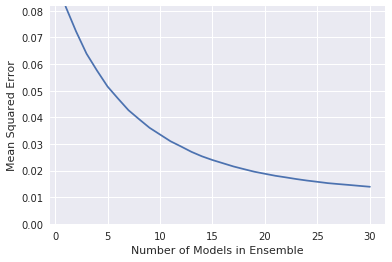

In [40]:
plt.plot(n_models, mse)
plt.axis('tight')
plt.xlabel('Number of Models in Ensemble')
plt.ylabel('Mean Squared Error')
plt.ylim((0.0, max(mse)))
plt.show()

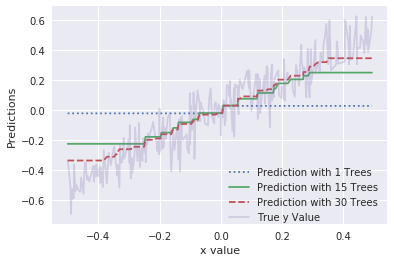

In [43]:
plot_list = [0, 14, 29]
line_type = [':', '-', '--']

plt.figure()

for i in range(len(plot_list)):
    i_plot = plot_list[i]
    text_legend = f'Prediction with {i_plot + 1} Trees'
    plt.plot(x_test, all_predictions[i_plot], label=text_legend, linestyle=line_type[i])
    
plt.plot(x_test, y_test, label='True y Value', alpha=0.25)
plt.legend(bbox_to_anchor=(1, 0.3))
plt.axis('tight')
plt.xlabel('x value')
plt.ylabel('Predictions')
plt.show()